In [1]:
from shared.preface import *
import shared.functions as fct
import shared.my_units as my
import shared.control_center as CC

## Scipy solve_ivp

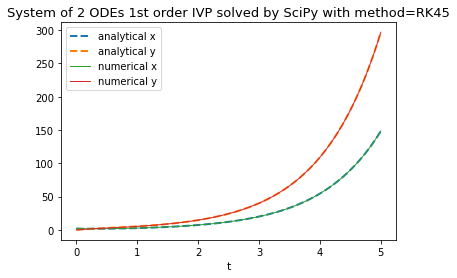

0.09373879432678223


In [5]:
t0 = time.time()

def ode_sys(t, XY):
	x=XY[0]
	y=XY[1]
	dx_dt= - x + y
	dy_dt= 4. * x - y
	return [dx_dt, dy_dt]

A = [[-1., 1.],
    [4., -1.]]

ode_sys = lambda t, XY : A @ XY

def ode_sys(t, XY):
	x=XY[0]
	y=XY[1]
	dx_dt= - x + y
	dy_dt= 4. * x - y
	return [dx_dt, dy_dt]

an_sol_x = lambda t : np.exp(t) + np.exp(-3. * t)
an_sol_y = lambda t : 2. * np.exp(t) - 2. * np.exp(-3. * t)

t_begin=0.
t_end=5.
t_nsamples=100
t_space = np.linspace(t_begin, t_end, t_nsamples)
x_init = 2.
y_init = 0.

x_an_sol = an_sol_x(t_space)
y_an_sol = an_sol_y(t_space)

method = 'RK45' #available methods: 'RK45', 'RK23', 'DOP853', 'Radau', 'BDF', 'LSODA'
num_sol = solve_ivp(ode_sys, [t_begin, t_end], [x_init, y_init], method=method, dense_output=True)
XY_num_sol = num_sol.sol(t_space)
x_num_sol = XY_num_sol[0].T
y_num_sol = XY_num_sol[1].T

plt.figure()
plt.plot(t_space, x_an_sol, '--', linewidth=2, label='analytical x')
plt.plot(t_space, y_an_sol, '--', linewidth=2, label='analytical y')
plt.plot(t_space, x_num_sol, linewidth=1, label='numerical x')
plt.plot(t_space, y_num_sol, linewidth=1, label='numerical y')
plt.title('System of 2 ODEs 1st order IVP solved by SciPy with method=' + method)
plt.xlabel('t')
plt.legend()
plt.show()

seconds = time.time()-t0
print(seconds)

## TensorFlow Probability

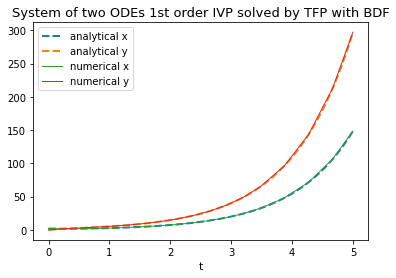

In [4]:
import tensorflow as tf
import tensorflow_probability as tfp

t0 = time.time()

def ode_sys(t, XY):
	x=XY[0]
	y=XY[1]
	dx_dt= - x + y
	dy_dt= 4. * x - y
	return [dx_dt, dy_dt]

an_sol_x = lambda t : np.exp(t) + np.exp(-3. * t)
an_sol_y = lambda t : 2. * np.exp(t) - 2. * np.exp(-3. * t)

t_begin=0.
t_end=5.
t_nsamples=100
t_space = np.linspace(t_begin, t_end, t_nsamples)
t_init = tf.constant(t_begin)
x_init = tf.constant(2.)
y_init = tf.constant(0.)

x_an_sol = an_sol_x(t_space)
y_an_sol = an_sol_y(t_space)

num_sol = tfp.math.ode.BDF().solve(ode_sys, t_init, [x_init, y_init],
	solution_times=tfp.math.ode.ChosenBySolver(tf.constant(t_end)) )

plt.figure()
plt.plot(t_space, x_an_sol, '--', linewidth=2, label='analytical x')
plt.plot(t_space, y_an_sol, '--', linewidth=2, label='analytical y')
plt.plot(num_sol.times, num_sol.states[0], linewidth=1, label='numerical x')
plt.plot(num_sol.times, num_sol.states[1], linewidth=1, label='numerical y')
plt.title('System of two ODEs 1st order IVP solved by TFP with BDF')
plt.xlabel('t')
plt.legend()
plt.show()

seconds = time.time()-t0
print(seconds)

## TorchDiffEq

In [2]:
import torch

torch.cuda.is_available()
torch.cuda.current_device()

False

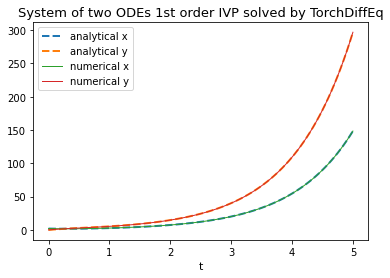

0.11767268180847168


In [4]:
import torch
from torchdiffeq import odeint

t0 = time.time()

def ode_sys(t, XY):
	x=XY[0]
	y=XY[1]
	dx_dt= torch.Tensor([- x + y])
	dy_dt= torch.Tensor([4. * x - y])
	return torch.cat([dx_dt, dy_dt])

an_sol_x = lambda t : np.exp(t) + np.exp(-3. * t)
an_sol_y = lambda t : 2. * np.exp(t) - 2. * np.exp(-3. * t)

t_begin=0.
t_end=5.
t_nsamples=100
t_space = np.linspace(t_begin, t_end, t_nsamples)
x_init = torch.Tensor([2.])
y_init = torch.Tensor([0.])

x_an_sol = an_sol_x(t_space)
y_an_sol = an_sol_y(t_space)

num_sol = odeint(ode_sys, torch.cat([x_init, y_init]), torch.Tensor(t_space)).numpy()

plt.figure()
plt.plot(t_space, x_an_sol, '--', linewidth=2, label='analytical x')
plt.plot(t_space, y_an_sol, '--', linewidth=2, label='analytical y')
plt.plot(t_space, num_sol[:,0], linewidth=1, label='numerical x')
plt.plot(t_space, num_sol[:,1], linewidth=1, label='numerical y')
plt.title('System of two ODEs 1st order IVP solved by TorchDiffEq')
plt.xlabel('t')
plt.legend()
plt.show()



seconds = time.time()-t0
print(seconds)

## TensorFlowDiffEq (not working)

In [2]:
import tensorflow as tf
from tfdiffeq import odeint

t0 = time.time()

def ode_sys(t, XY):
	x=XY[0]
	y=XY[1]
	dx_dt= - x + y
	dy_dt= 4. * x - y
	return tf.stack([dx_dt, dy_dt])

an_sol_x = lambda t : np.exp(t) + np.exp(-3. * t)
an_sol_y = lambda t : 2. * np.exp(t) - 2. * np.exp(-3. * t)

t_begin=0.
t_end=5.
t_nsamples=100
t_space = np.linspace(t_begin, t_end, t_nsamples)
x_init = tf.constant([2.])
y_init = tf.constant([0.])

x_an_sol = an_sol_x(t_space)
y_an_sol = an_sol_y(t_space)

num_sol = odeint(
    ode_sys, 
    tf.convert_to_tensor([x_init, y_init], dtype=tf.float64), 
    tf.constant(t_space)).numpy()

plt.figure()
plt.plot(t_space, x_an_sol, '--', linewidth=2, label='analytical x')
plt.plot(t_space, y_an_sol, '--', linewidth=2, label='analytical y')
plt.plot(t_space, num_sol[:,0], linewidth=1, label='numerical x')
plt.plot(t_space, num_sol[:,1], linewidth=1, label='numerical y')
plt.title('System of two ODEs 1st order IVP solved by TensorFlowDiffEq')
plt.xlabel('t')
plt.legend()
plt.show()


seconds = time.time()-t0
print(seconds)

ModuleNotFoundError: No module named 'tfdiffeq'